In [9]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from IPython.display import Image

In [10]:
display(Image(url="tech_challenge_1.png", width=600, height=600), Image(url="tech_challenge_2.png", width=600, height=600))

In [11]:
# dataset = pl.read_csv('../Data/Visualizacao Dados/Fase 1/ExpVinho.csv', separator=';', has_header=True)
dataset = pd.read_csv('../Data/Visualizacao Dados/Fase 1/ExpVinho.csv', sep=';')
dataset.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,4,Angola,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
dataset.drop("Id", axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Columns: 105 entries, País to 2021.1
dtypes: int64(104), object(1)
memory usage: 101.8+ KB


In [13]:
dataset.rename(columns={"País": "pais"}, inplace=True)
dataset.head()

,pais,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,Angola,0,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
colunas = [coluna for coluna in dataset.columns if '.1' in coluna]
colunas.insert(0, 'pais')
dataset_valor = dataset[colunas]
dataset_valor.columns = dataset_valor.columns.str.replace('.1', '')
dataset_valor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pais    124 non-null    object
 1   1970    124 non-null    int64 
 2   1971    124 non-null    int64 
 3   1972    124 non-null    int64 
 4   1973    124 non-null    int64 
 5   1974    124 non-null    int64 
 6   1975    124 non-null    int64 
 7   1976    124 non-null    int64 
 8   1977    124 non-null    int64 
 9   1978    124 non-null    int64 
 10  1979    124 non-null    int64 
 11  1980    124 non-null    int64 
 12  1981    124 non-null    int64 
 13  1982    124 non-null    int64 
 14  1983    124 non-null    int64 
 15  1984    124 non-null    int64 
 16  1985    124 non-null    int64 
 17  1986    124 non-null    int64 
 18  1987    124 non-null    int64 
 19  1988    124 non-null    int64 
 20  1989    124 non-null    int64 
 21  1990    124 non-null    int64 
 22  1991    124 non-null    in

In [15]:
colunas.remove('pais')
dataset_quantidade = dataset.drop(colunas, axis=1)
dataset_quantidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pais    124 non-null    object
 1   1970    124 non-null    int64 
 2   1971    124 non-null    int64 
 3   1972    124 non-null    int64 
 4   1973    124 non-null    int64 
 5   1974    124 non-null    int64 
 6   1975    124 non-null    int64 
 7   1976    124 non-null    int64 
 8   1977    124 non-null    int64 
 9   1978    124 non-null    int64 
 10  1979    124 non-null    int64 
 11  1980    124 non-null    int64 
 12  1981    124 non-null    int64 
 13  1982    124 non-null    int64 
 14  1983    124 non-null    int64 
 15  1984    124 non-null    int64 
 16  1985    124 non-null    int64 
 17  1986    124 non-null    int64 
 18  1987    124 non-null    int64 
 19  1988    124 non-null    int64 
 20  1989    124 non-null    int64 
 21  1990    124 non-null    int64 
 22  1991    124 non-null    in

In [16]:
dataset_quantidade.head(3)

,pais,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26,4,0
2,"Alemanha, República Democrática",0,0,4168,12000,0,0,0,0,0,...,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698


In [17]:
dataset_valor.head(3)

,pais,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,95,21,0
2,"Alemanha, República Democrática",0,0,2630,8250,0,0,0,0,0,...,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741


In [18]:
dataset_quantidade_unpivot = dataset_quantidade.reset_index().melt(id_vars=["pais"], value_vars=dataset_quantidade.columns) # type: ignore
dataset_quantidade_unpivot.columns = ["pais_destino", "ano", "quantidade"]
dataset_quantidade_unpivot.insert(0, 'pais_origem', 'Brasil')
dataset_quantidade_unpivot.ano = dataset_quantidade_unpivot.ano.astype("datetime64[ns]").dt.year
dataset_quantidade_unpivot

,pais_origem,pais_destino,ano,quantidade
0,Brasil,Afeganistão,1970,0
1,Brasil,África do Sul,1970,0
2,Brasil,"Alemanha, República Democrática",1970,0
3,Brasil,Angola,1970,0
4,Brasil,Anguilla,1970,0
...,...,...,...,...
6443,Brasil,Tuvalu,2021,0
6444,Brasil,Uruguai,2021,136774
6445,Brasil,Vanuatu,2021,0
6446,Brasil,Venezuela,2021,26415


In [19]:
dataset_valor_unpivot = dataset_valor.reset_index().melt(id_vars=["pais"], value_vars=dataset_valor.columns) # type: ignore
dataset_valor_unpivot.columns = ["pais_destino", "ano", "valor"]
dataset_valor_unpivot.insert(0, 'pais_origem', 'Brasil')
dataset_valor_unpivot.ano = dataset_valor_unpivot.ano.astype("datetime64[ns]").dt.year
dataset_valor_unpivot

,pais_origem,pais_destino,ano,valor
0,Brasil,Afeganistão,1970,0
1,Brasil,África do Sul,1970,0
2,Brasil,"Alemanha, República Democrática",1970,0
3,Brasil,Angola,1970,0
4,Brasil,Anguilla,1970,0
...,...,...,...,...
6443,Brasil,Tuvalu,2021,0
6444,Brasil,Uruguai,2021,149842
6445,Brasil,Vanuatu,2021,0
6446,Brasil,Venezuela,2021,35944


In [20]:
dataset_unpivot = pd.merge(dataset_quantidade_unpivot, dataset_valor_unpivot, left_on=['pais_origem', 'pais_destino', 'ano'], right_on=['pais_origem', 'pais_destino', 'ano'])
dataset_unpivot

,pais_origem,pais_destino,ano,quantidade,valor
0,Brasil,Afeganistão,1970,0,0
1,Brasil,África do Sul,1970,0,0
2,Brasil,"Alemanha, República Democrática",1970,0,0
3,Brasil,Angola,1970,0,0
4,Brasil,Anguilla,1970,0,0
...,...,...,...,...,...
6443,Brasil,Tuvalu,2021,0,0
6444,Brasil,Uruguai,2021,136774,149842
6445,Brasil,Vanuatu,2021,0,0
6446,Brasil,Venezuela,2021,26415,35944


- fornecer o montante de venda de exportação dos últimos 15 anos
- separando a analise por país
- e trazendo quais as prospercções futuras e possíveis ações para uma melhoria nas exportações
- Construa gráfico atraentes e que passem a ideia central para que os acionistas e invetidores possam seguir em frente com suas ações.

In [21]:
dataset_periodo = dataset_unpivot.query("ano>=2007")
dataset_periodo.ano.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021], dtype=int32)

In [22]:
total_ano = dataset_periodo.groupby('ano').sum()
total_ano = total_ano.iloc[:,2:4]
total_ano.head()

,quantidade,valor
ano,,
2007,3281752,3686150
2008,10346323,7118100
2009,25514198,8940988
2010,1280574,2595303
2011,1214834,3615120


In [23]:
total_pais = dataset_periodo.groupby('pais_destino').sum()
total_pais = total_pais.iloc[:,2:4].sort_values(by=['quantidade', 'valor'], ascending=False)
total_pais['quantidade'] = total_pais['quantidade'] / 1_000_000
total_pais['valor'] = total_pais['valor'] / 1_000_000
total_pais

,quantidade,valor
pais_destino,,
Rússia,39.230153,25.559026
Paraguai,25.423559,32.364257
Estados Unidos,3.822251,10.046712
China,2.411701,4.372268
Espanha,1.993000,3.808552
...,...,...
Líbano,0.000000,0.000000
Porto Rico,0.000000,0.000000
Senegal,0.000000,0.000000


In [24]:
total = dataset_periodo.groupby(['pais_origem', 'pais_destino', 'ano']).sum()
total.head()

quantidade  valor
pais_origem pais_destino ano                    
Brasil      Afeganistão  2007           0      0
                         2008           0      0
                         2009           0      0
                         2010           0      0
                         2011           0      0

In [25]:
dataset_periodo[['quantidade', 'valor']].describe().round()

,quantidade,valor
count,1860.0,1860.0
mean,45289.0,56659.0
std,597620.0,479032.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,1013.0,4038.0
max,21912914.0,14795694.0


In [26]:
total_pais.query("quantidade>1 and valor>1")

,quantidade,valor
pais_destino,,
Rússia,39.230153,25.559026
Paraguai,25.423559,32.364257
Estados Unidos,3.822251,10.046712
China,2.411701,4.372268
Espanha,1.993000,3.808552
Japão,1.502311,2.612375
Países Baixos,1.410166,4.119122
Reino Unido,1.305329,4.717554
Haiti,1.238100,1.586194


In [27]:
total_pais.index = total_pais.index.str.replace('Alemanha, República Democrática', 'Alemanha')
total_pais.index = total_pais.index.str.replace('Taiwan (FORMOSA)', 'Taiwan')
total_pais.index = total_pais.index.str.replace('Tcheca, República', 'República Tcheca')

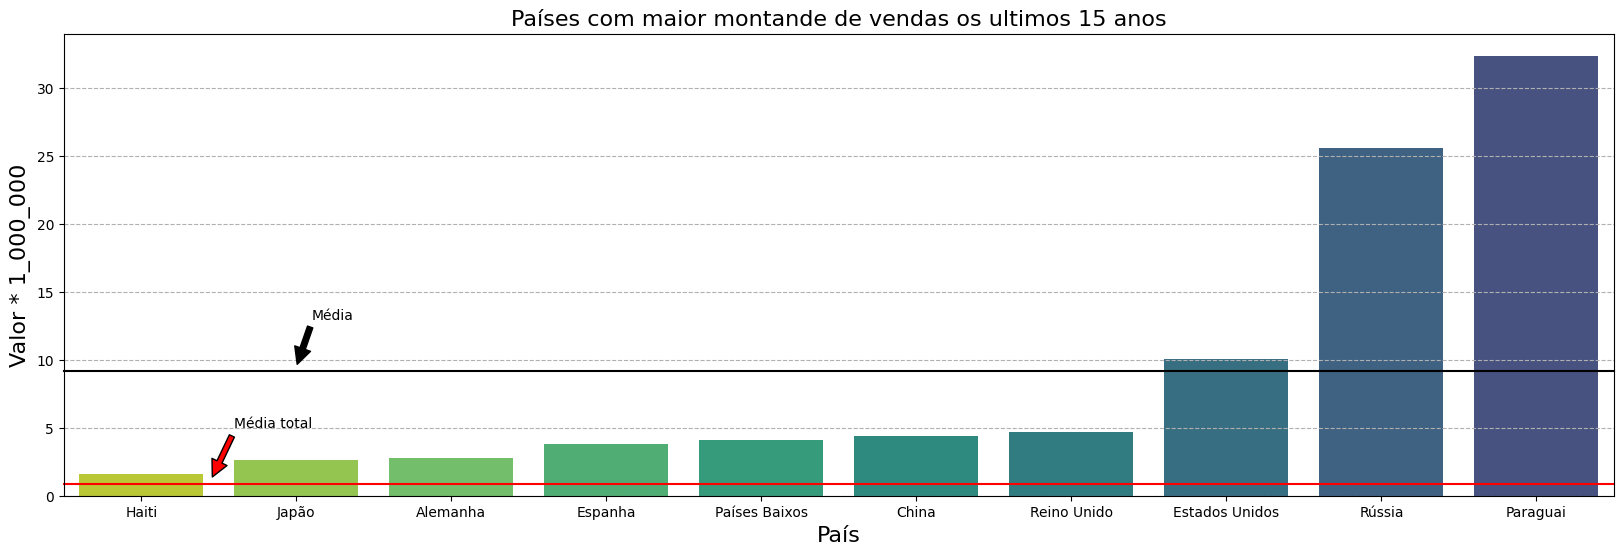

In [28]:
paises_valor = total_pais.query("quantidade>1 and valor>1").sort_values('valor', ascending=True)
palette = sns.color_palette("viridis_r", 12)
plt.figure(figsize=(20,6))
ax = sns.barplot(data=paises_valor, x=paises_valor.index, y='valor', palette=palette)
ax.axhline(paises_valor['valor'].mean(), color="k", clip_on=False)
plt.annotate('Média', xy=(1, 9.5), xytext=(1.1, 13), arrowprops=dict(facecolor='k', shrink=0.05))
ax.axhline(total_pais['valor'].mean(), color="r", clip_on=False)
plt.annotate('Média total', xy=(0.45, 1.2), xytext=(0.6, 5), arrowprops=dict(facecolor='r', shrink=0.05))
ax.set_ylabel("Valor * 1_000_000", fontsize=16)
ax.set_xlabel("País", fontsize=16)
ax.set_title("Países com maior montande de vendas os ultimos 15 anos", fontsize=16)
plt.gca().yaxis.grid(linestyle='--')
plt.show()

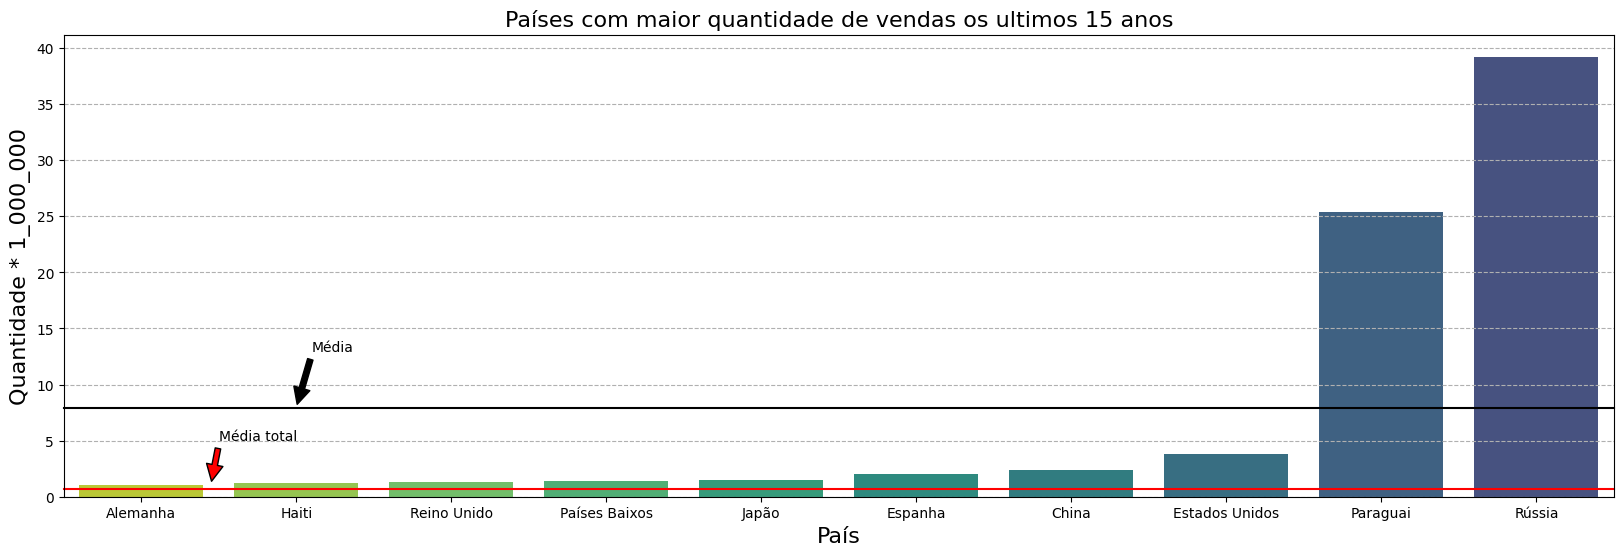

In [29]:
paises_valor = total_pais.query("quantidade>1 and valor>1").sort_values('quantidade', ascending=True)
palette = sns.color_palette("viridis_r", 12)
plt.figure(figsize=(20,6))
ax = sns.barplot(data=paises_valor, x=paises_valor.index, y='quantidade', palette=palette)
ax.axhline(paises_valor['quantidade'].mean(), color="k", clip_on=False)
plt.annotate('Média', xy=(1, 8), xytext=(1.1, 13), arrowprops=dict(facecolor='k', shrink=0.05))
ax.axhline(total_pais['quantidade'].mean(), color="r", clip_on=False)
plt.annotate('Média total', xy=(0.45, 1.2), xytext=(0.5, 5), arrowprops=dict(facecolor='r', shrink=0.05))
ax.set_ylabel("Quantidade * 1_000_000", fontsize=16)
ax.set_xlabel("País", fontsize=16)
ax.set_title("Países com maior quantidade de vendas os ultimos 15 anos", fontsize=16)
plt.gca().yaxis.grid(linestyle='--')
plt.show()

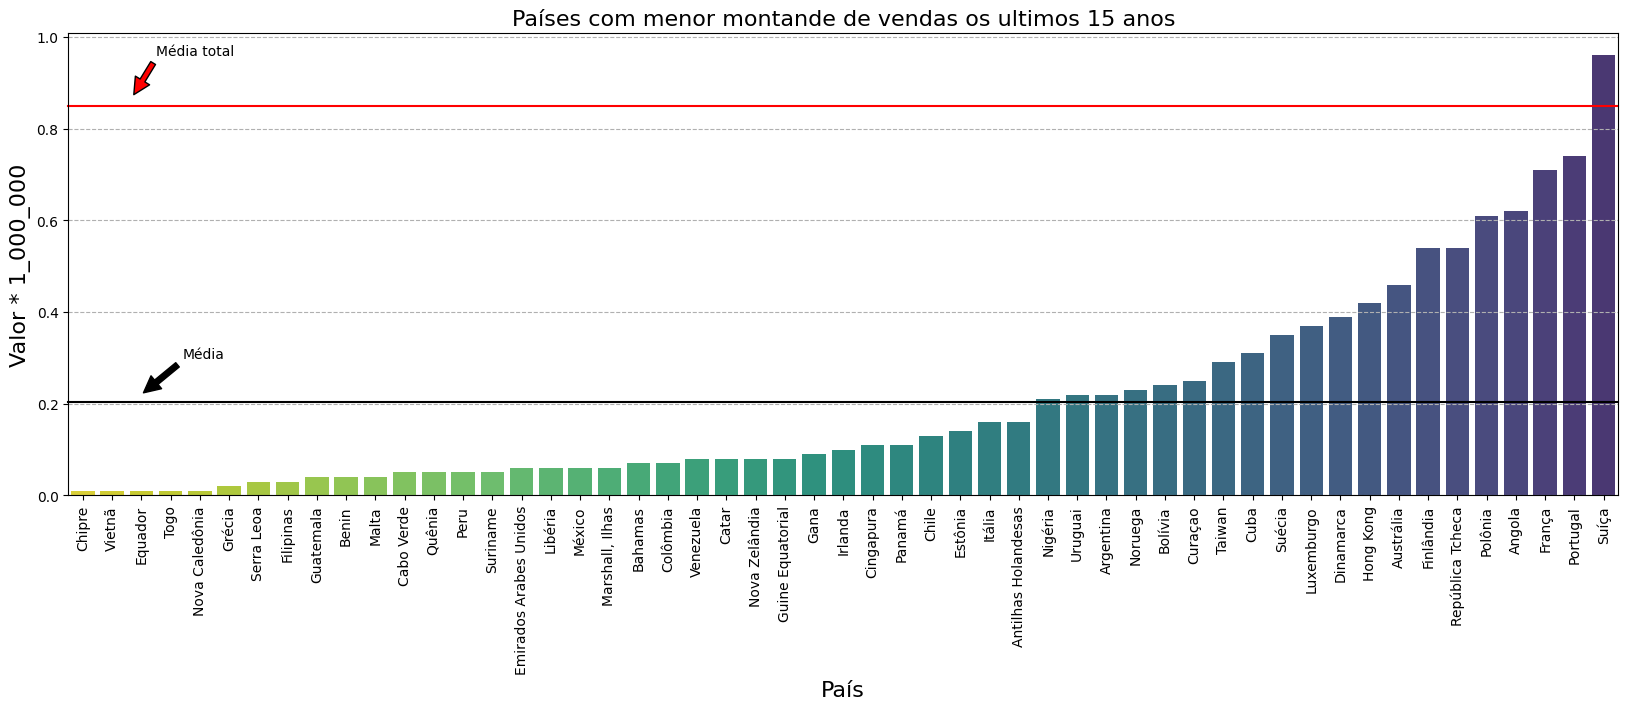

In [30]:
paises_valor = total_pais.round(2).query("quantidade<=1 and quantidade!=0.00 and valor<=1 and valor!=0.00").sort_values('valor', ascending=True)
palette = sns.color_palette("viridis_r", 60)
plt.figure(figsize=(20,6))
ax = sns.barplot(data=paises_valor, x=paises_valor.index, y='valor', palette=palette, orient="v")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=10)
ax.axhline(paises_valor['valor'].mean(), color="k", clip_on=False)
plt.annotate('Média', xy=(2, 0.22), xytext=(3.4, 0.30), arrowprops=dict(facecolor='k', shrink=0.05))
ax.axhline(total_pais['valor'].mean(), color="r", clip_on=False)
plt.annotate('Média total', xy=(1.7, 0.87), xytext=(2.5, 0.96), arrowprops=dict(facecolor='r', shrink=0.05))
ax.set_ylabel("Valor * 1_000_000", fontsize=16)
ax.set_xlabel("País", fontsize=16)
ax.set_title("Países com menor montande de vendas os ultimos 15 anos", fontsize=16)
plt.gca().yaxis.grid(linestyle='--')
plt.show()

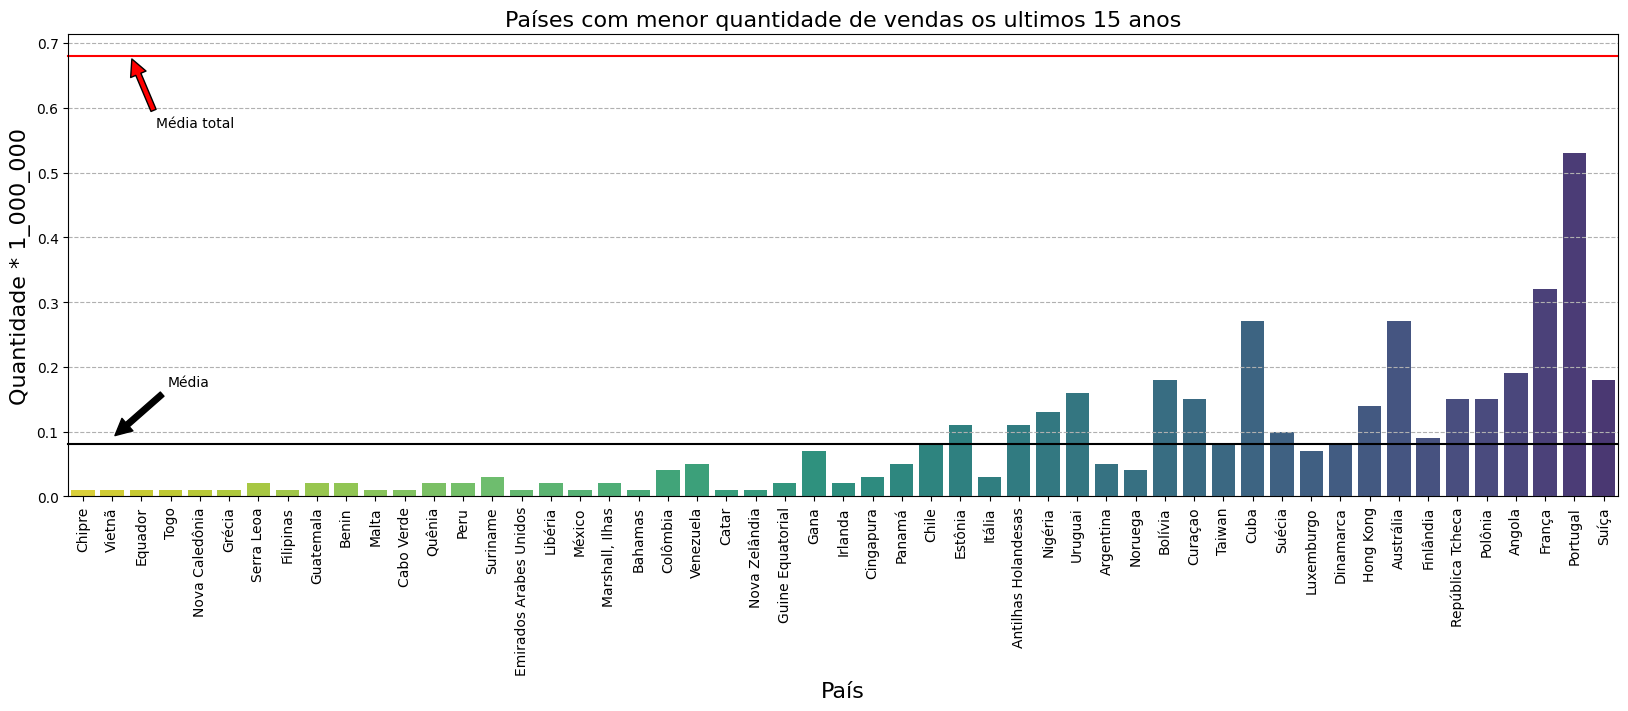

In [31]:
paises_valor = total_pais.round(2).query("quantidade<=1 and quantidade!=0.00 and valor<=1 and valor!=0.00").sort_values('valor', ascending=True)
palette = sns.color_palette("viridis_r", 60)
plt.figure(figsize=(20,6))
ax = sns.barplot(data=paises_valor, x=paises_valor.index, y='quantidade', palette=palette, orient="v")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=10)
ax.axhline(paises_valor['quantidade'].mean(), color="k", clip_on=False)
plt.annotate('Média', xy=(1, 0.09), xytext=(2.9, 0.17), arrowprops=dict(facecolor='k', shrink=0.05))
ax.axhline(total_pais['quantidade'].mean(), color="r", clip_on=False)
plt.annotate('Média total', xy=(1.63, 0.68), xytext=(2.5, 0.57), arrowprops=dict(facecolor='r', shrink=0.05))
ax.set_ylabel("Quantidade * 1_000_000", fontsize=16)
ax.set_xlabel("País", fontsize=16)
ax.set_title("Países com menor quantidade de vendas os ultimos 15 anos", fontsize=16)
plt.gca().yaxis.grid(linestyle='--')
plt.show()